## Understanding the dataset

Datset Description

Features:


1.UserName  : Coded Username

2.ScreenName : Coded Screename

3.location   :  Region of origin

4.TweetAt   :  Tweet Timing

5.OriginalTweet: first tweet in thread

6.Sentiment-Target Variable : Sentiment of the tweet


**Problem Statement -**

To built a classification model to predict the sentiments of COVID-19 tweets.tweets have been pulled from the Twitter and manual tagging has been done.The names and usernames has given codes to avoid any privacy concerns.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import nltk
import string

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
#laod the data
df = pd.read_csv("/content/drive/MyDrive/tweet_data/Coronavirus Tweets.csv" , encoding='latin-1')

In [ ]:
#print few rows
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#print the shape of the data : no of rows and columns
df.shape

(41157, 6)

In [ ]:
#columns to keep
tweet_df = df[['UserName', 'OriginalTweet','Sentiment']]

In [ ]:
#check the distributionof the data among output class
tweet_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
#keeping only two class :Postive and Negative , for the shake of simplicity

# tweet_df.drop(tweet_df[(tweet_df['Sentiment'] == 'Neutral')  ].index, inplace=True )
tweet_df.drop(tweet_df[(tweet_df['Sentiment'] == 'Neutral')  ].index, inplace=True )

tweet_df.drop(tweet_df[(tweet_df['Sentiment'] == 'Extremely Positive')  ].index, inplace=True )

tweet_df.drop(tweet_df[(tweet_df['Sentiment'] == 'Extremely Negative')  ].index, inplace=True )

new_df = tweet_df


In [ ]:
new_df.head()

,UserName,OriginalTweet,Sentiment
1,3800,advice Talk to your neighbours family to excha...,Positive
2,3801,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,My food stock is not the only one which is emp...,Positive
5,3804,As news of the regionÂs first confirmed COVID...,Positive
6,3805,Cashier at grocery store was sharing his insig...,Positive


In [ ]:
new_df['Sentiment'].value_counts()

Positive    11422
Negative     9917
Name: Sentiment, dtype: int64

In [ ]:
# Map output class: 
# Positive --> 1
# Negatvie --> 0

new_df['Sentiment'] = new_df['Sentiment'].map({'Positive':1 , 'Negative' :0})

In [ ]:
new_df.head()

,UserName,OriginalTweet,Sentiment
1,3800,advice Talk to your neighbours family to excha...,1
2,3801,Coronavirus Australia: Woolworths to give elde...,1
3,3802,My food stock is not the only one which is emp...,1
5,3804,As news of the regionÂs first confirmed COVID...,1
6,3805,Cashier at grocery store was sharing his insig...,1


In [ ]:
#shape of final dataframe
new_df.shape

(21339, 3)

In [ ]:
#final data frame contains no null observations
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21339 entries, 1 to 41156
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       21339 non-null  int64 
 1   OriginalTweet  21339 non-null  object
 2   Sentiment      21339 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 666.8+ KB


In [ ]:
#print few original sentenace or tweet from original tweeets column

sent_100 =new_df.iloc[100]['OriginalTweet']
print(sent_100 )

Our retail store will be closed through the end of March. We are doing this to keep our staff and customers safe during the COVID-19 crisis. We WILL continue to fulfill and ship out orders placed online. Pickups will not be available until we return to regular hours. https://t.co/h1DQBiPbuB


In [ ]:
sent_150 =new_df.iloc[150]['OriginalTweet']
print(sent_150 )





#Apple #retail #AppleStore #coronavirus #health #closing #quarantine #China #GreaterChina


In [ ]:
sent_1000 = new_df.iloc[1000]['OriginalTweet']
print(sent_1000 )

Went out to our local Edeka supermarket for some essentials. Was very happy to see them limiting the number of people in the store, sanitising everyoneÂs hands on entry and allowing the elderly to skip the queue. Calm queue with no panic ?? #COVID2019 https://t.co/iT8LUOVwYD


In [ ]:
sent_2000 = new_df.iloc[2000]['OriginalTweet']
print(sent_2000 )

In a time of crisis a nation finds it leaders you are one Thanks for listening to the feedback re exclusive shopping hours and online prioritization for and action ing both Stay blessed


In [ ]:
#remove Urls from the Texts
import re
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_100 = re.sub(r"http\S+", "", sent_100)
sent_150 = re.sub(r"http\S+", "", sent_150)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_2000 = re.sub(r"http\S+", "", sent_2000)

print(sent_100)

Our retail store will be closed through the end of March. We are doing this to keep our staff and customers safe during the COVID-19 crisis. We WILL continue to fulfill and ship out orders placed online. Pickups will not be available until we return to regular hours. 


In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_100, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_150, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_2000, 'lxml')
text = soup.get_text()
print(text)

Our retail store will be closed through the end of March. We are doing this to keep our staff and customers safe during the COVID-19 crisis. We WILL continue to fulfill and ship out orders placed online. Pickups will not be available until we return to regular hours. 




#Apple #retail #AppleStore #coronavirus #health #closing #quarantine #China #GreaterChina
Went out to our local Edeka supermarket for some essentials. Was very happy to see them limiting the number of people in the store, sanitising everyoneÂs hands on entry and allowing the elderly to skip the queue. Calm queue with no panic ?? #COVID2019 
In a time of crisis a nation finds it leaders you are one Thanks for listening to the feedback re exclusive shopping hours and online prioritization for and action ing both Stay blessed


In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase) #replace words like Won't with will not
    phrase = re.sub(r"can\'t", "can not", phrase) #replace words like can't with can not

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent_1000 = decontracted(sent_1000)
print(sent_1000)
print("="*50)

Went out to our local Edeka supermarket for some essentials. Was very happy to see them limiting the number of people in the store, sanitising everyoneÂs hands on entry and allowing the elderly to skip the queue. Calm queue with no panic ?? #COVID2019 


In [ ]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_150 = re.sub("\S*\d\S*", "", sent_150).strip()
print(sent_150)





#Apple #retail #AppleStore #coronavirus #health #closing #quarantine #China #GreaterChina


In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1000 = re.sub('[^A-Za-z0-9]+', ' ', sent_1000)
print(sent_1000)

Went out to our local Edeka supermarket for some essentials Was very happy to see them limiting the number of people in the store sanitising everyone s hands on entry and allowing the elderly to skip the queue Calm queue with no panic COVID2019 


In [ ]:
#remove stop words 

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(new_df['OriginalTweet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 21339/21339 [00:19<00:00, 1091.29it/s]


In [ ]:
len(preprocessed_reviews)

21339

In [ ]:
preprocessed_reviews[150]

'apple closed retail locations outside china march reopened apple store locations within greater china apple retail applestore coronavirus health closing quarantine china greaterchina'

###  Featurization

### BAG OF WORDS

In [ ]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaaakubosan', 'aaaand', 'aaanews', 'aaannnddd', 'aaanortheast', 'aacopd', 'aahealth', 'aahh']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (21339, 33995)
the number of unique words  33995


### TF-IDF

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abc', 'abcnews', 'ability', 'able', 'able buy', 'able get', 'able keep', 'able stock', 'absolute', 'absolutely']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (21339, 6299)
the number of unique words including both unigrams and bigrams  6299


In [ ]:
array = final_tf_idf.todense()  #convert sparse matrix to dense matrix
df = pd.DataFrame(array)        #again convert to pandas dataframe
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6289,6290,6291,6292,6293,6294,6295,6296,6297,6298
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#print the shape of final dataset that to be trained on ML models
df.shape

(21339, 6299)

In [ ]:
X = df
y = new_df[['Sentiment']]


## Train and Test Dataset Construction

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (17071, 6299)
Number of data points in test data : (4268, 6299)


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Machine Learning Models

## Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.8769834878053719


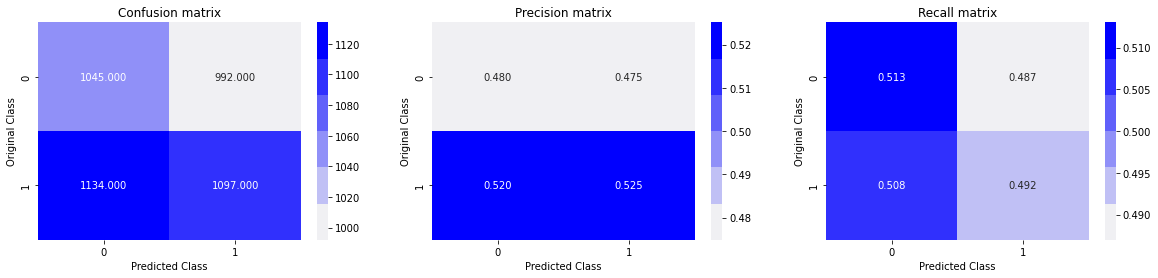

In [ ]:
# import numpy as np
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4673537104391222
For values of alpha =  0.0001 The log loss is: 0.49977513601978174
For values of alpha =  0.001 The log loss is: 0.574365517952016
For values of alpha =  0.01 The log loss is: 0.6087370642148898
For values of alpha =  0.1 The log loss is: 0.6138006452489515
For values of alpha =  1 The log loss is: 0.6150204870307779
For values of alpha =  10 The log loss is: 0.6297050520263741


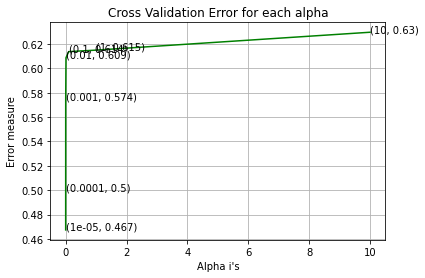

For values of best alpha =  1e-05 The train log loss is: 0.3023358622044266
For values of best alpha =  1e-05 The test log loss is: 0.4673537104391222
Total number of data points : 4268


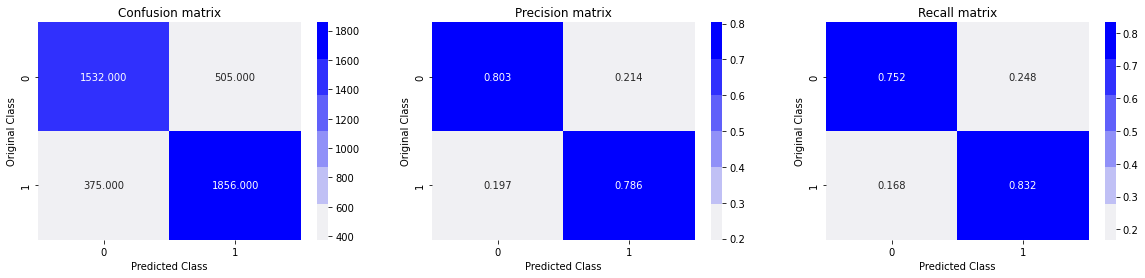

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.47400272238941615
For values of alpha =  0.0001 The log loss is: 0.4560244949702008
For values of alpha =  0.001 The log loss is: 0.6435730134332897
For values of alpha =  0.01 The log loss is: 0.6926071340749584
For values of alpha =  0.1 The log loss is: 0.6926071340749584
For values of alpha =  1 The log loss is: 0.69260713407496
For values of alpha =  10 The log loss is: 0.6926071340749617


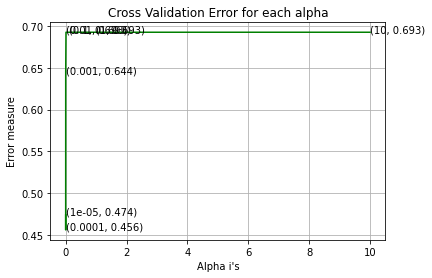

For values of best alpha =  0.0001 The train log loss is: 0.37913120674934325
For values of best alpha =  0.0001 The test log loss is: 0.4560244949702008
Total number of data points : 4268


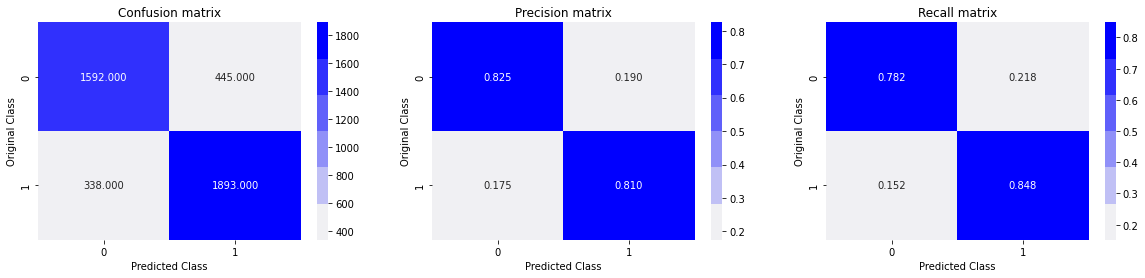

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## XGBoost

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.691851	valid-logloss:0.692014
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.681072	valid-logloss:0.682975
[20]	train-logloss:0.672996	valid-logloss:0.676107
[30]	train-logloss:0.666721	valid-logloss:0.670948
[40]	train-logloss:0.661389	valid-logloss:0.666584
[50]	train-logloss:0.65683	valid-logloss:0.66295
[60]	train-logloss:0.65265	valid-logloss:0.659734
[70]	train-logloss:0.648988	valid-logloss:0.656974
[80]	train-logloss:0.645607	valid-logloss:0.654395
[90]	train-logloss:0.642471	valid-logloss:0.651924
[100]	train-logloss:0.639675	valid-logloss:0.649652
[110]	train-logloss:0.636957	valid-logloss:0.647571
[120]	train-logloss:0.634389	valid-logloss:0.645686
[130]	train-logloss:0.632084	valid-logloss:0.643899
[140]	train-logloss:0.629834	valid-logloss:0.642314
[150]	train-logloss:0.627725	valid-logloss:0.640824
[160]	train-logloss:0.625637	va

Total number of data points : 4268


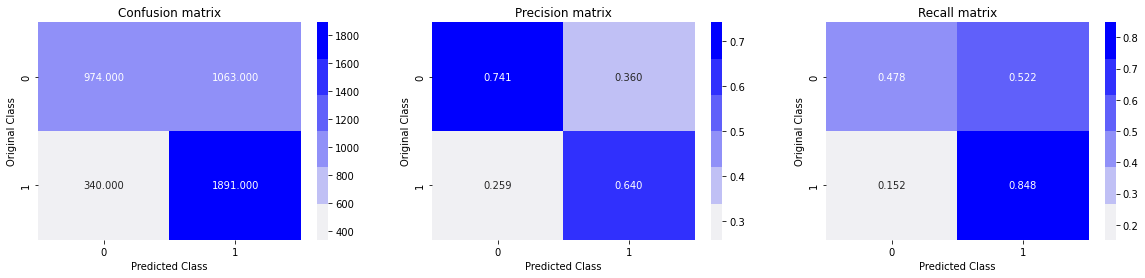

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

##observations
1. Among 3 Models,our best performing model is Linear SVM with test log loss 0.45.
2. Precision for class 1 (Positive) is 81% and recall is 84.8%.
3. Precision for class 0 (Negative) is 82.5% and recall is 78.2%.
4. Performance can be furthur imporved by using deep learning models,however at cost of computational expense.